**3. Dựa vào file ‘SoftmaxRegression-Delta-1D-2Class-stochastic.ipynb’, cài đặt lại cho file data ‘iris_full.csv’.**

Testing loss:  0.11113133966290417
Testing accuracy:  1.0
Training loss:  0.13006049638235953
Training accuracy:  0.97
Evaluation loss:  0.16731861006630783
Evaluation accuracy:  0.95


[Text(0.5, 1.0, 'Evaluation accuracy'),
 Text(0.5, 0, 'iteration'),
 Text(0, 0.5, 'accuracy')]

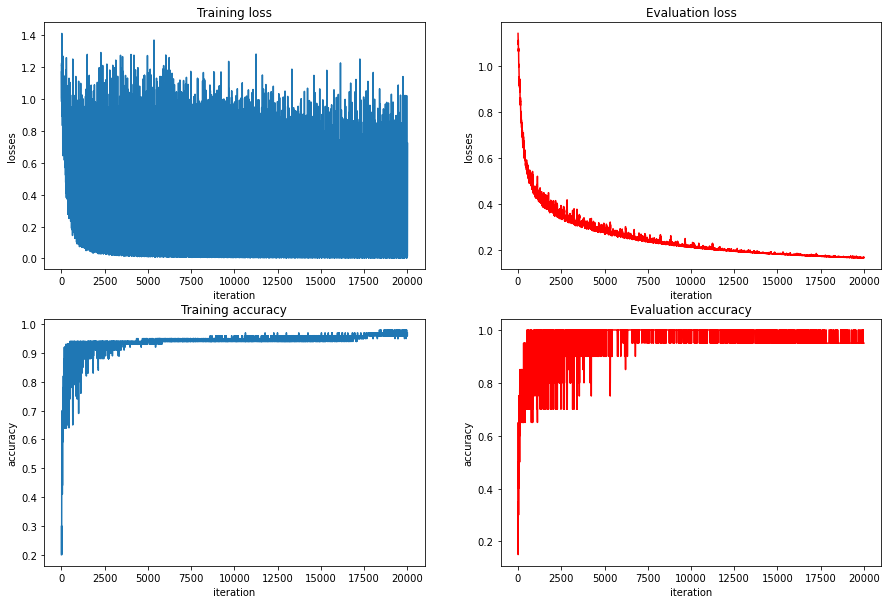

In [1]:
import numpy as np
import matplotlib.pyplot as plt
iris = np.genfromtxt('iris_full.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:4]
y = iris[:, 4]
y = y.astype('uint8') # Nx1

# normalization
maxi = np.max(X, axis=0)
mini = np.min(X, axis=0)
X = (X-mini) / (maxi-mini)

# concatenation [1 X]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1) # Nx(d+1)

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)
X = X[inds]
y = y[inds]

# split into train, valuation and test set
X_train, X_val, X_test, y_train, y_val, y_test = X[:100, :], X[100:120, :], X[120:, :], \
                                                 y[:100], y[100:120], y[120:]
X_train_size = X_train.shape[0]
inds = np.arange(X_train_size)


d = 4 # dimensionality
k = 3 # number of classes

# initialize parameters randomly
theta = np.random.rand(3,5) # kx(d+1)

# gradient descent loop
learning_rate = .05

train_losses = []
val_losses = []
train_acc = []
val_acc = []

num_iter = 200
num_sample_stochastic = 1

for epoch in range(num_iter):
    
    # shuffle
    np.random.shuffle(inds)
    X_train = X_train[inds]
    y_train = y_train[inds]
    
    for i in range(X_train_size): 
        
        # pick 1 sample
        xi = X_train[i:i+1] # 1x(d+1)
        xi = xi.T # (d+1)x1
        yi = y_train[i:i+1] # 1x1

        # evaluate class scores
        scores = np.dot(theta, xi) # kx1 
        
        #compute the class probabilities
        exp_scores = np.exp(scores) # kx1
        probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True) # kx1
        
        # compute the loss
        corect_logprobs = -np.log(probs[yi, range(num_sample_stochastic)]) 
        loss = np.sum(corect_logprobs)/1
        train_losses.append(loss)
                
        # compute the gradient on scores
        dscores = probs # kx1
        dscores[yi, range(num_sample_stochastic)] -= 1
        
        # backpropate the gradient to the parameters (W,b)
        dtheta = np.dot(xi, dscores.T) # (d+1)xk

        # perform a parameter update
        theta += -learning_rate *dtheta.T # kx(d+1)        
        
        # accuracy
        scores = np.dot(theta, X_train.T)
        predicted_class = np.argmax(scores, axis=0)
        train_acc.append(np.mean(predicted_class == y_train))
        
        # evaluation
        scores = np.dot(theta, X_val.T) 
        exp_scores = np.exp(scores) 
        probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True) 
        corect_logprobs = -np.log(probs[y_val, range(X_val.shape[0])])
        loss = corect_logprobs.mean()
        val_losses.append(loss)
        predicted_class = np.argmax(scores, axis=0)
        val_acc.append(np.mean(predicted_class == y_val))
        
# testing 
test_scores = np.dot(theta, X_test.T)
test_exp_scores = np.exp(test_scores) 
test_probs = test_exp_scores / np.sum(test_exp_scores, axis=0, keepdims=True)
test_corect_logprobs = -np.log(test_probs[y_test, range(y_test.shape[0])])
print('Testing loss: ', test_corect_logprobs.mean())
print('Testing accuracy: ', np.mean(np.argmax(test_scores, axis=0) == y_test))
train_scores = np.dot(theta, X_train.T)
train_exp_scores = np.exp(train_scores) #
train_probs = train_exp_scores / np.sum(train_exp_scores, axis=0, keepdims=True)
train_corect_logprobs = -np.log(train_probs[y_train, range(y_train.shape[0])])
print('Training loss: ', train_corect_logprobs.mean())
print('Training accuracy: ', np.mean(np.argmax(train_scores, axis=0) == y_train))
print('Evaluation loss: ', val_losses[-1])
print('Evaluation accuracy: ', val_acc[-1])

# show figures
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0][0].plot(train_losses)
axs[0][0].set(title='Training loss', xlabel='iteration', ylabel='losses')
axs[0][1].plot(val_losses, color='r')
axs[0][1].set(title='Evaluation loss', xlabel='iteration', ylabel='losses')
axs[1][0].plot(train_acc)
axs[1][0].set(title='Training accuracy', xlabel='iteration', ylabel='accuracy')
axs[1][1].plot(val_acc, color='r')
axs[1][1].set(title='Evaluation accuracy', xlabel='iteration', ylabel='accuracy')

**4. Dựa vàofile ‘SoftmaxRegression-Delta-1D-2Class-batch.ipynb’, cài đặt lại cho file data ‘iris_full.csv’.**

Testing loss:  0.05766943823446935
Testing accuracy:  1.0
Training loss:  0.07211290389960992
Training accuracy:  0.97
Evaluation loss:  0.08083048459256179
Evaluation accuracy:  1.0


[Text(0.5, 1.0, 'Evaluation accuracy'),
 Text(0.5, 0, 'iteration'),
 Text(0, 0.5, 'accuracy')]

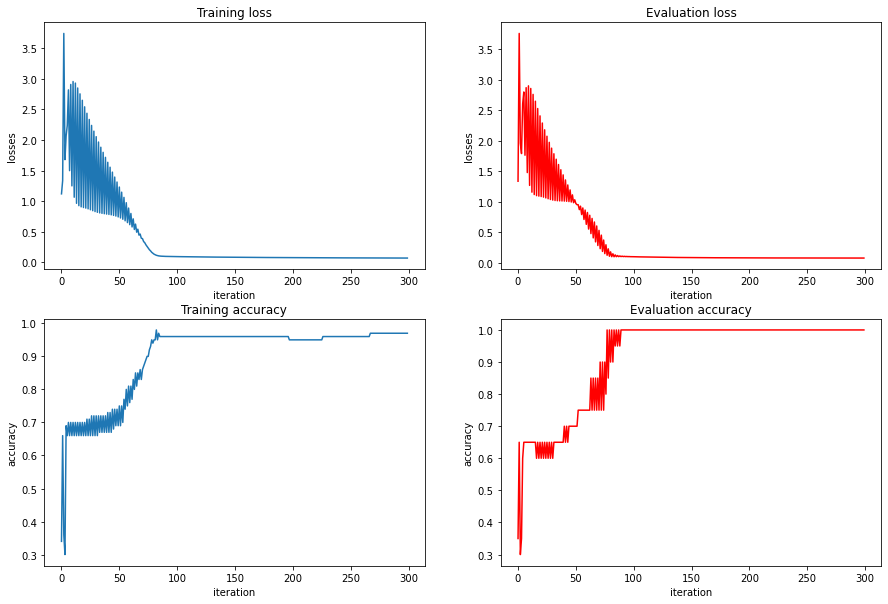

In [2]:
import numpy as np
import matplotlib.pyplot as plt
iris = np.genfromtxt('iris_full.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:4]
y = iris[:, 4]
y = y.astype('uint8') # Nx1

# normalization
maxi = np.max(X, axis=0)
mini = np.min(X, axis=0)
X = (X-mini) / (maxi-mini)

# concatenation [1 X]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1) # Nx(d+1)

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)
X = X[inds]
y = y[inds]

# split into train, valuation and test set
X_train, X_val, X_test, y_train, y_val, y_test = X[:100, :], X[100:120, :], X[120:, :], \
                                                 y[:100], y[100:120], y[120:]
X_train_size = X_train.shape[0]
inds = np.arange(X_train_size)


d = 4 # dimensionality
k = 3 # number of classes

# initialize parameters randomly
theta = np.random.rand(3,5) # kx(d+1)

# gradient descent loop
learning_rate = .1

train_losses = []
val_losses = []
train_acc = []
val_acc = []

num_iter = 300

for epoch in range(num_iter):
    
    # shuffle
    np.random.shuffle(inds)
    X_train = X_train[inds]
    y_train = y_train[inds]

    # evaluate class scores
    scores = np.dot(theta, X_train.T) # kx1 

    #compute the class probabilities
    exp_scores = np.exp(scores) # kx1
    probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True) # kx1

    # compute the loss
    corect_logprobs = -np.log(probs[y_train, range(X_train_size)]) 
    loss = corect_logprobs.mean()
    train_losses.append(loss)

    # compute the gradient on scores
    dscores = probs # kx1
    dscores[y_train, range(X_train_size)] -= 1

    # backpropate the gradient to the parameters (W,b)
    dtheta = np.dot(X_train.T, dscores.T) # (d+1)xk

    # perform a parameter update
    theta += -learning_rate *dtheta.T # kx(d+1)        

    # accuracy
    scores = np.dot(theta, X_train.T)
    predicted_class = np.argmax(scores, axis=0)
    train_acc.append(np.mean(predicted_class == y_train))

    # evaluation
    scores = np.dot(theta, X_val.T) 
    exp_scores = np.exp(scores) 
    probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True) 
    corect_logprobs = -np.log(probs[y_val, range(X_val.shape[0])])
    loss = corect_logprobs.mean()
    val_losses.append(loss)
    predicted_class = np.argmax(scores, axis=0)
    val_acc.append(np.mean(predicted_class == y_val))
        
# testing 
test_scores = np.dot(theta, X_test.T)
test_exp_scores = np.exp(test_scores) 
test_probs = test_exp_scores / np.sum(test_exp_scores, axis=0, keepdims=True)
test_corect_logprobs = -np.log(test_probs[y_test, range(y_test.shape[0])])
print('Testing loss: ', test_corect_logprobs.mean())
print('Testing accuracy: ', np.mean(np.argmax(test_scores, axis=0) == y_test))
train_scores = np.dot(theta, X_train.T)
train_exp_scores = np.exp(train_scores) #
train_probs = train_exp_scores / np.sum(train_exp_scores, axis=0, keepdims=True)
train_corect_logprobs = -np.log(train_probs[y_train, range(y_train.shape[0])])
print('Training loss: ', train_corect_logprobs.mean())
print('Training accuracy: ', np.mean(np.argmax(train_scores, axis=0) == y_train))
print('Evaluation loss: ', val_losses[-1])
print('Evaluation accuracy: ', val_acc[-1])

# show figures
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0][0].plot(train_losses)
axs[0][0].set(title='Training loss', xlabel='iteration', ylabel='losses')
axs[0][1].plot(val_losses, color='r')
axs[0][1].set(title='Evaluation loss', xlabel='iteration', ylabel='losses')
axs[1][0].plot(train_acc)
axs[1][0].set(title='Training accuracy', xlabel='iteration', ylabel='accuracy')
axs[1][1].plot(val_acc, color='r')
axs[1][1].set(title='Evaluation accuracy', xlabel='iteration', ylabel='accuracy')